In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from pandas.plotting import autocorrelation_plot
#from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [22]:
dat = pd.read_csv('assets/master_currency.csv')
dat.head()

,Date,EUR,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,GBP,HKD,HRK,ILS,INR
0,2022-05-18,1.052299,0.702494,0.538039,0.202466,0.780153,1.003512,0.148269,0.042695,0.141403,1.242854,0.127411,0.139655,0.298436,0.012889
1,2022-05-17,1.054074,0.703037,0.538967,0.200321,0.779849,1.008065,0.148677,0.042655,0.141653,1.248907,0.127393,0.140089,0.297876,0.012910
2,2022-05-16,1.042209,0.692185,0.532879,0.197316,0.773575,0.994530,0.147232,0.042177,0.140046,1.225490,0.127390,0.138544,0.293789,0.012854
3,2022-05-15,1.038529,0.689275,0.530983,0.195191,0.768994,1.000000,0.147278,0.041977,0.139561,1.220107,0.127389,0.138099,0.291826,0.012912
4,2022-05-14,1.038529,0.689275,0.530983,0.195191,0.768994,1.000000,0.147278,0.041977,0.139561,1.220107,0.127389,0.138099,0.291826,0.012912


In [ ]:
#will do regression on BGN-CHF and BGN-HRK
#and correlation on AUD-CZK and BRL-CHF

In [23]:
bgn = dat['BGN']
chf = dat['CHF']
hrk = dat['HRK']
label = dat['Date']

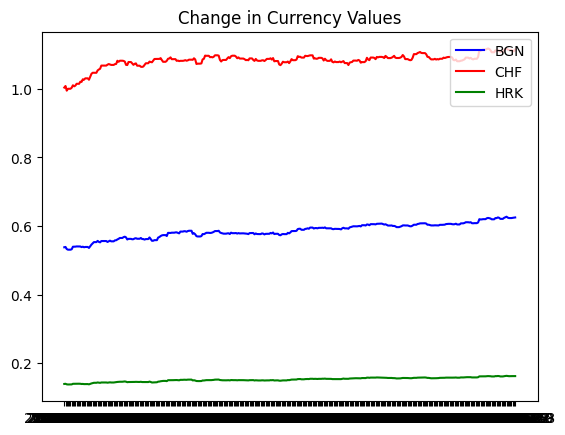

In [24]:
plt.plot(label,bgn, color = 'blue', label = 'BGN')
plt.plot(label,chf, color = 'red', label = 'CHF')
plt.plot(label, hrk, color='green', label = 'HRK')

plt.legend(loc='best')
plt.title('Change in Currency Values')
plt.show()


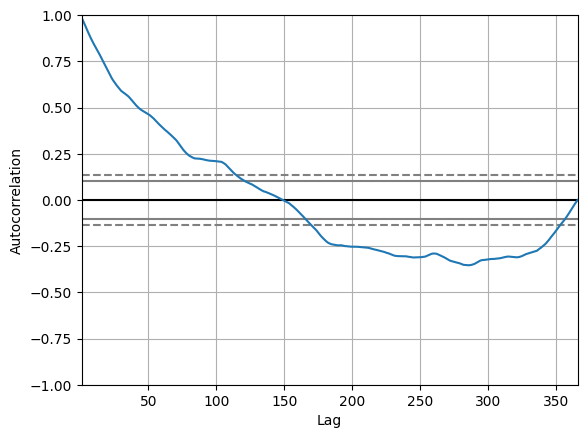

In [25]:
autocorrelation_plot(bgn)
plt.show()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


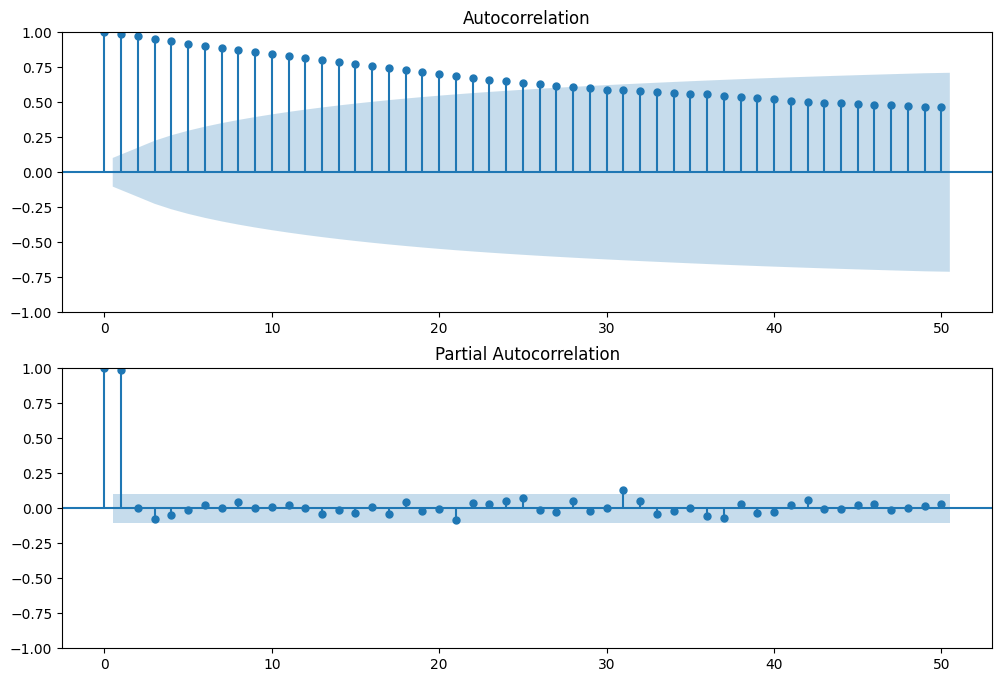

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(bgn,lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(bgn,lags=50,ax=ax2)

In [27]:
model = ARIMA(bgn, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    BGN   No. Observations:                  366
Model:                 ARIMA(1, 1, 0)   Log Likelihood                1754.307
Date:                Fri, 30 Sep 2022   AIC                          -3504.614
Time:                        21:37:28   BIC                          -3496.815
Sample:                             0   HQIC                         -3501.515
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0139      0.049      0.280      0.779      -0.083       0.111
sigma2      3.914e-06   1.57e-07     24.918      0.000    3.61e-06    4.22e-06
Ljung-Box (L1) (Q):                   0.08   Jarque-